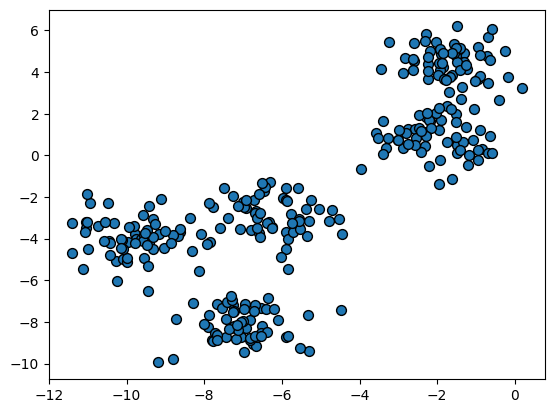

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

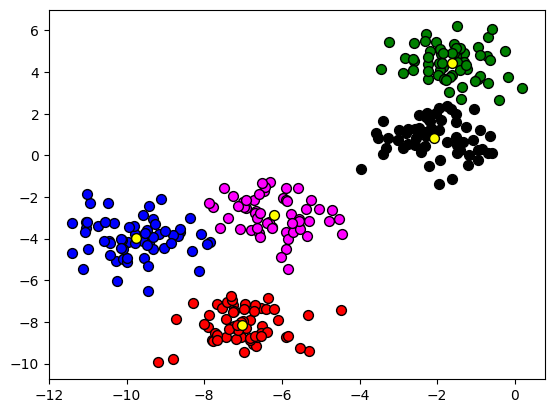

In [2]:
kmeans = KMeans(n_clusters=5, random_state=1, n_init="auto").fit(X)

colors = ['red', 'green', 'blue', 'k', 'magenta']
labels = kmeans.labels_

for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], s=50, edgecolor='k', color=colors[labels[i]])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=50, edgecolor='k')
plt.show()

0.6127026803856701


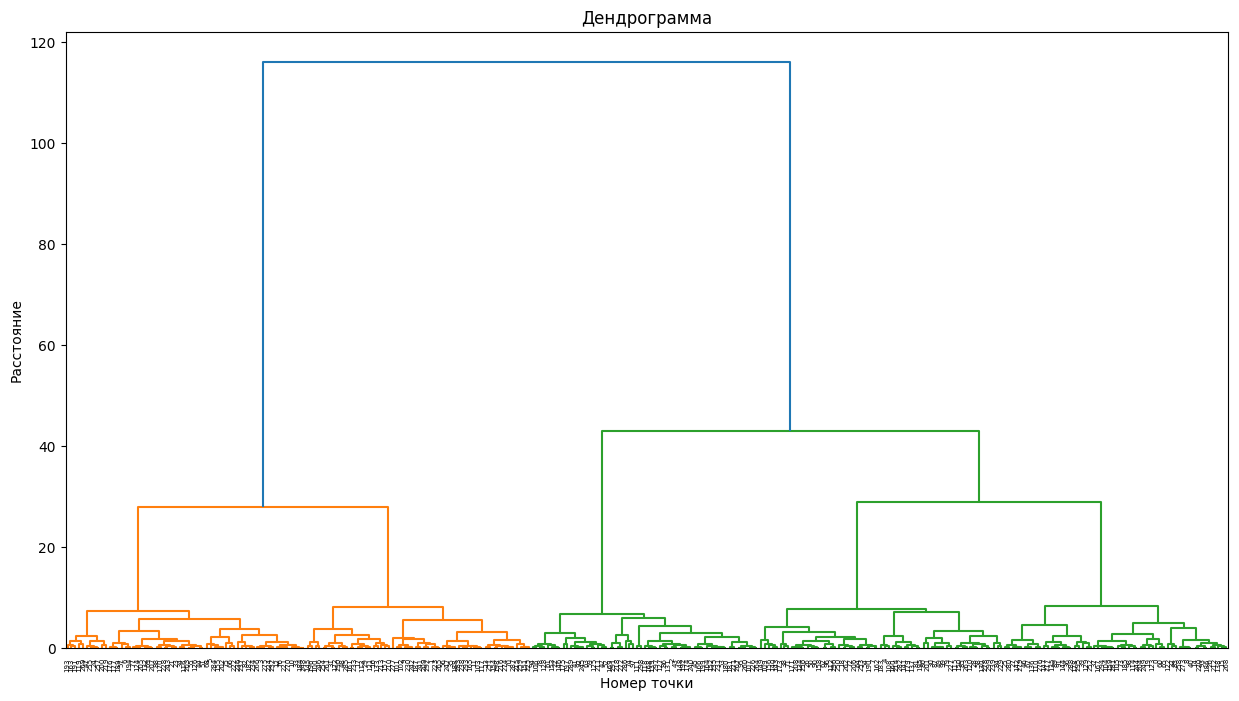

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


model = AgglomerativeClustering(
                distance_threshold=20,
                n_clusters=None, 
                linkage='ward',
                metric='euclidean'
            )
labels = model.fit_predict(X)
            
score = silhouette_score(X, labels)

Z = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(15, 8))

print(score)
dendrogram(Z)
plt.title(f'Дендрограмма')
plt.xlabel('Номер точки')
plt.ylabel('Расстояние')
plt.show()

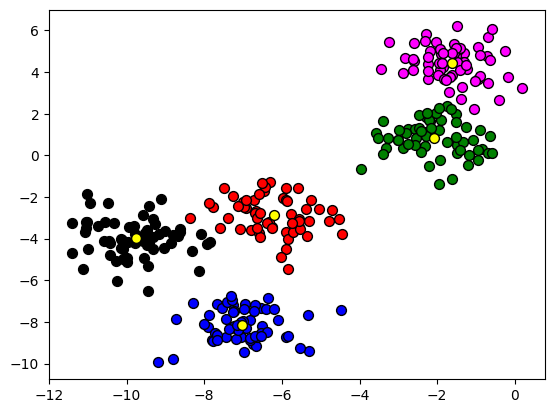

In [4]:
colors = ['red', 'green', 'blue', 'k', 'magenta']
labels = model.labels_

for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], s=50, edgecolor='k', color=colors[labels[i]])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=50, edgecolor='k')
plt.show()

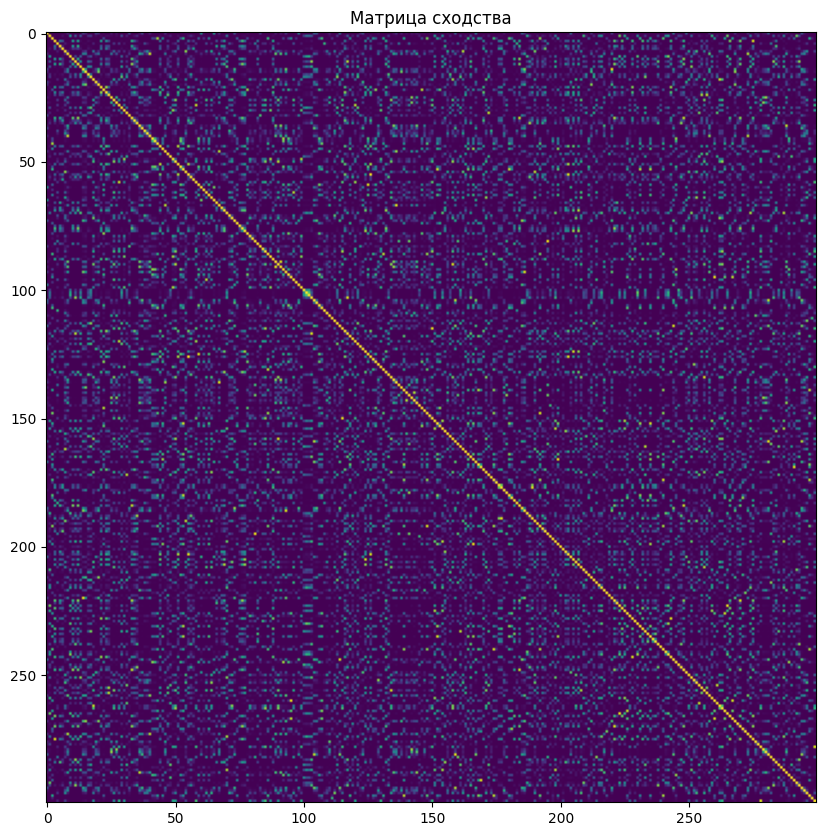

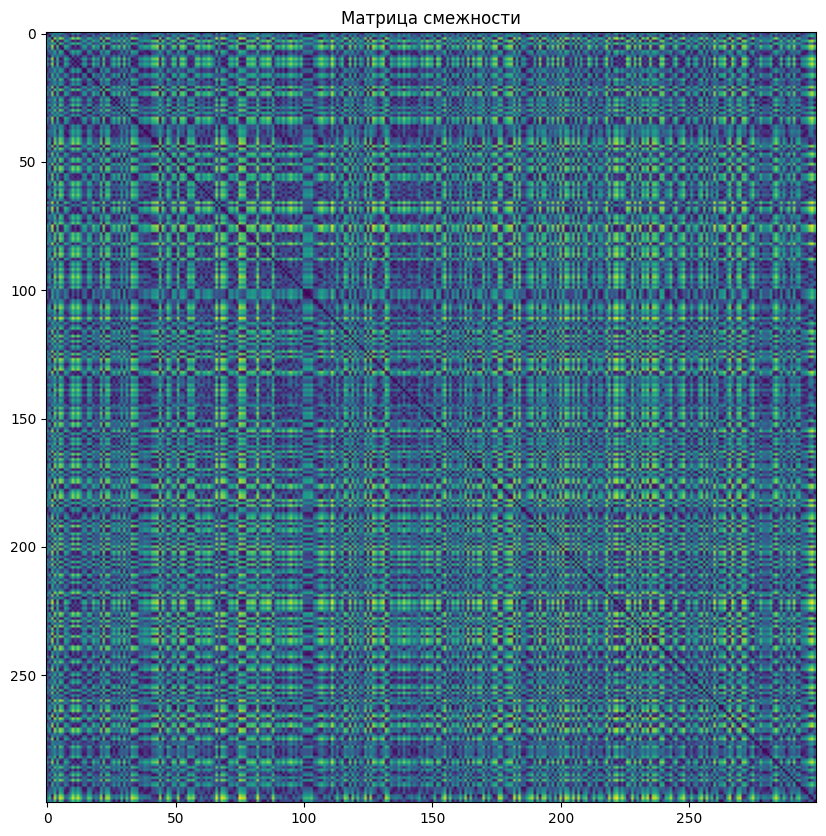

In [5]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X, metric='euclidean')
S = np.exp(-D)

plt.figure(figsize=(10,10))
plt.imshow(S)
plt.title('Матрица сходства')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(D)
plt.title('Матрица смежности')
plt.show()

In [2]:
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering, HDBSCAN


data = pd.read_csv("toy_galaxies.csv") 
display(data.head(3))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.x, data.y, data.z, marker='.', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


In [17]:
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show();

    ARI = round(ari(data.label,cluster.labels_),4) 


    print('ARI = {}'.format(ARI))
    return ARI

In [18]:
cluster = HDBSCAN(min_cluster_size=6,
                  min_samples=5, 
                  cluster_selection_epsilon=0.1, 
                  metric='euclidean', 
                  leaf_size=10)

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data, cluster)

ARI = 0.9132


0.9132